In [1]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly import tools
from plotly.graph_objs import Line, Marker
from collections import Counter
import plotly.graph_objs as go

In [2]:
df= pd.read_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/Merged_Clean.csv')

In [3]:
df.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,instant_bookable,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
0,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-11-04,f,59.0,59.0,3,1125,0.383577,239
1,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-02,f,69.0,69.0,3,1125,0.383577,239
2,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-28,f,61.0,61.0,3,1125,0.383577,239
3,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-30,f,65.0,65.0,3,1125,0.383577,239
4,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-31,f,63.0,63.0,3,1125,0.383577,239


In [5]:
df['price_y'] = df['price_y'].astype(str).replace(',', '')
df['price_y'] = df['price_y'].str.replace('$', '')
df['price_y'] = df['price_y'].astype(float)

<ipython-input-5-b39297be42db>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [6]:
df['price_y'].dtype

dtype('float64')

In [9]:
# Categorizing and Visualizing differernt listings based on room_type
roomType_DF=df.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF
trace_room_type = go.Bar(x=roomType_DF.room_type, y=roomType_DF.number_Of_Listings,
                         text=roomType_DF.number_Of_Listings,
                         textposition = 'auto',
    marker=dict(
        color=(['rgba(222,45,38,0.8)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               ]),
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    
               )
layout= dict(
    title='<b>Room Type Distribution</b>',
    xaxis=dict(
        title='Room_Type',
        color='#7f7f7f',
        
        ),
    yaxis2=dict(
        title='Number_Of_Listings',
        color='#7f7f7f',
        )
)

data=[trace_room_type]
fig = dict( data=data, layout=layout )
py.iplot(fig)

In [10]:
# Analyzing and plotting the number of listings based on their property type

propertytype_DF = df.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'number_Of_Listings'})
trace_property_type = go.Bar(x=propertytype_DF.property_type, y=propertytype_DF.number_Of_Listings,
                         text=propertytype_DF.number_Of_Listings,
                         textposition = 'auto',
    marker=dict(
#         color=([
#                'rgba(204,204,204,1)','rgba(222,45,38,0.8)', 'rgba(204,204,204,1)',
#                ]),
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    
               )

layout= dict(
    title='<b>Property Type Distribution</b>',
    xaxis=dict(
        title='Property_Type',
        color='#7f7f7f',
        categoryorder= 'array',
        categoryarray= [x for _, x in sorted(zip(propertytype_DF.number_Of_Listings, propertytype_DF.property_type))]
        
        ),
    yaxis2=dict(
        title='Number_Of_Listings',
        color='#7f7f7f',
        
        )
    
)

data=[trace_property_type]
fig = dict( data=data, layout=layout )
py.iplot(fig)

As evident from the graph, primarily entire apartments are rented out by owners rather than private or shared rooms. 
Property Type is seen as an important factor. Airbnb in Amsterdam mostly includes listings that are either Entire Homes or Apartments. They also include other types of propertiesso like condo, hotels,villas,townhouse and serviced apartments

In [11]:
# analyzing the prices for different room type and property type

roomProperty_DF = df.groupby(['property_type','room_type']).price_y.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price_y',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price_y
38,Room in aparthotel,Entire home/apt,420.833333
15,Entire villa,Entire home/apt,363.320000
26,Private room in guesthouse,Private room,353.946237
54,Tower,Entire home/apt,346.800000
16,Houseboat,Entire home/apt,341.101286


<AxesSubplot:xlabel='room_type', ylabel='property_type'>

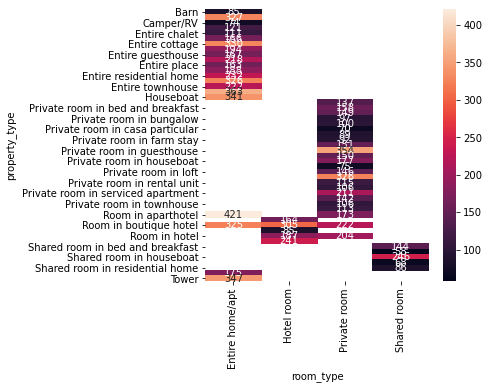

In [15]:
#plotting heatmap mean price for a room and a property type
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.groupby(['property_type', 'room_type']).price_y.mean().unstack(),annot=True, fmt=".0f")

The heatmap shows that the Price of majority of property types are higher for Entire Home/Apartment compared to others. This reflects the importance of property type and room type features. 

<AxesSubplot:xlabel='accommodates', ylabel='neighbourhood_cleansed'>

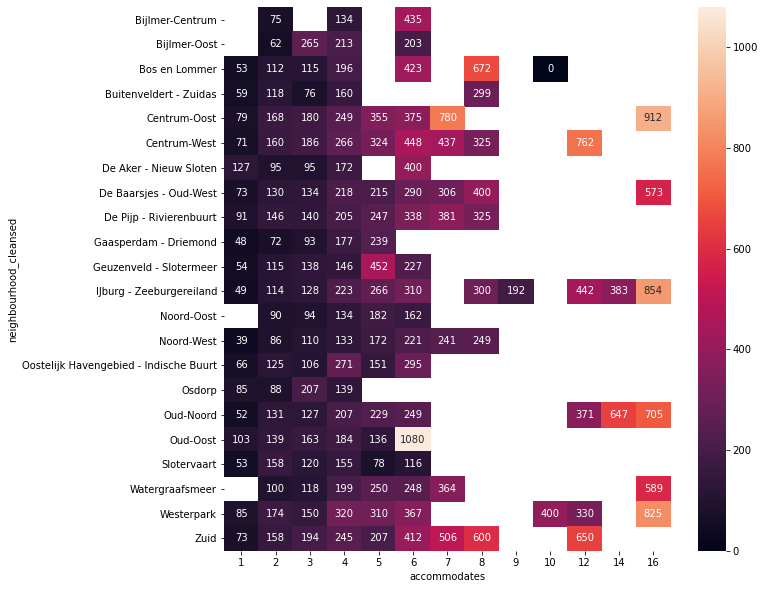

In [25]:
# HeatMap for variation of prices with number of bedrooms for listings
plt.figure(figsize=(10,10))
sns.heatmap(df.groupby(['neighbourhood_cleansed','accommodates']).price_y.mean().unstack(),annot=True, fmt=".0f")

In [18]:
neighbourhoodPrice_DF=df.groupby('neighbourhood_cleansed').price_y.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price_y':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()


trace_room_type = go.Bar(x=neighbourhoodPrice_DF.neighbourhood_cleansed, y=neighbourhoodPrice_DF.Average_Price,
#                          text=roomType_DF.number_Of_Listings,
#                          textposition = 'auto',
    marker=dict(
        color=(['rgba(222,45,38,0.8)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               ]),
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    
               )

layout= dict(
    title='<b>Neighbourhood Distribution In Amsterdam,North Holland</b>',
    xaxis=dict(
        title='Neighbourhood',
        color='#7f7f7f',
        
        ),
    yaxis=dict(
        title='Price',
        color='#7f7f7f',
        
        )
    
)

data=[trace_room_type]
fig = dict( data=data, layout=layout )
py.iplot(fig)



Above two graphs clearly reflect that with Shared Accommodation and type of Neighbourhood, price increases. So Accommodates and Neighbourhood are important actors as well

In [56]:
avg_sent_df=df.groupby('id').Mean_Sent_Pol.mean()
avg_price_df=df.groupby('id').price_y.mean()
sent_price_df=pd.DataFrame
sent_price_df=pd.merge(avg_sent_df,avg_price_df,on = 'id')
sent_price_df=sent_price_df.reset_index()
sent_price_df=sent_price_df.rename(columns={'Mean_Sent_Pol':'Average_Sentiment_Score','price_y':'Average_Price'})
sent_price_df=sent_price_df.sort_values('Average_Price',ascending=[0])
sent_price_df.head()

trace_room_type = go.Bar(x=sent_price_df['Average_Sentiment_Score'], y=sent_price_df['Average_Price'],
#                          text=roomType_DF.number_Of_Listings,
#                          textposition = 'auto',
    marker=dict(
        color=(['rgba(222,45,38,0.8)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               ]),
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    
               )

layout= dict(
    title='<b>Price Distribution by Sentiment Score of each Listing</b>',
    xaxis=dict(
        title='Sentiment Score',
        color='#7f7f7f',
        
        ),
    yaxis=dict(
        title='Price',
        color='#7f7f7f',
        
        )
    
)

data=[trace_room_type]
fig = dict( data=data, layout=layout )
py.iplot(fig)

Since we used Sentiment Polarity for reviews of each listing, the sentiment score ranges from [-1,1]. We can see that Price is moderate or high for listings with moderate sentiments